In [ ]:
# TEAM: AI ML 07 

#### Team Members:  1.Sneha Sable   2. Hrutik Naik   3. Shravani Dhuri   4. Shrumi Dedhia  5. Vikram Rao 

#### Problem Statement: Gather data on companies like Walmart, IKEA etc. Try to visualize and identify any trend useful for the company. Implementation of a model for predicting the sales of the most/least sold product for future campaigns.

# PREDICTION MODEL CODE

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("walmart_clean.csv")
data.head()

,Store,Size,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Week,Day,Month,Year,Type_A,Type_B,Type_C
0,1,151315,2010-02-05,42.31,2.572,211.096358,8.106,0,1,24924.50,5,5,2,2010,1,0,0
1,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,3,14612.19,5,5,2,2010,0,1,0
2,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,4,26323.15,5,5,2,2010,0,1,0
3,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,5,36414.63,5,5,2,2010,0,1,0
4,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,6,11437.81,5,5,2,2010,0,1,0


We drop the column date as we have three columns (week, month, year) to represent the date as integer.

In [6]:
data.drop('Date',axis=1, inplace=True)
data.head()

,Store,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Week,Day,Month,Year,Type_A,Type_B,Type_C
0,1,151315,42.31,2.572,211.096358,8.106,0,1,24924.50,5,5,2,2010,1,0,0
1,35,103681,27.19,2.784,135.352461,9.262,0,3,14612.19,5,5,2,2010,0,1,0
2,35,103681,27.19,2.784,135.352461,9.262,0,4,26323.15,5,5,2,2010,0,1,0
3,35,103681,27.19,2.784,135.352461,9.262,0,5,36414.63,5,5,2,2010,0,1,0
4,35,103681,27.19,2.784,135.352461,9.262,0,6,11437.81,5,5,2,2010,0,1,0


In [7]:
data.shape

(420212, 16)

## Spliting the dataset into Train and Test

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    ridge_regression,
    Lasso,
    SGDRegressor,
    Ridge
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
y = data['Weekly_Sales']
X = data.drop(['Weekly_Sales', 'Store', 'Year'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (294148, 13) (294148,)
Test:  (126064, 13) (126064,)


## Linear Regression

In [10]:
LR = LinearRegression(normalize=True, fit_intercept=True)
LR.fit(X_train,y_train)

print("lr.coef_: {}".format(LR.coef_))
print("lr.intercept_: {}".format(LR.intercept_))

lr.coef_: [ 1.05556925e-01  1.58560795e+01 -1.99434737e+02 -1.64616339e+01
 -3.22048526e+02  1.21892358e+03  1.11322277e+02 -6.76843908e+02
  7.77041238e+01  3.10207266e+03  3.40169757e+16  3.40169757e+16
  3.40169757e+16]
lr.intercept_: -3.4016975711337784e+16


In [11]:
print("Training set score: {:.2f}".format(LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LR.score(X_test, y_test)))

Training set score: 0.09
Test set score: 0.08


In [12]:
y_pred = LR.predict(X_test)

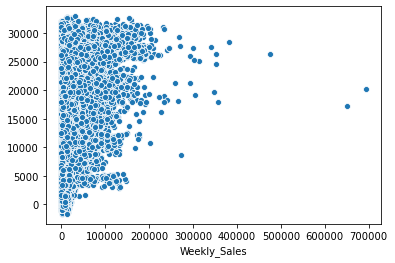

In [13]:
sns.scatterplot(y_test, y_pred)

## KNN Regressor

In [14]:
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=4, n_neighbors=10)

In [15]:
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.51
Test set score: 0.40


In [16]:
y_pred = knn.predict(X_test)

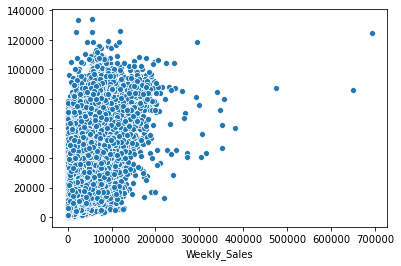

In [17]:
sns.scatterplot(y_test, y_pred)

## Decission Tree Regressor

In [18]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.96


In [20]:
y_pred = tree.predict(X_test)

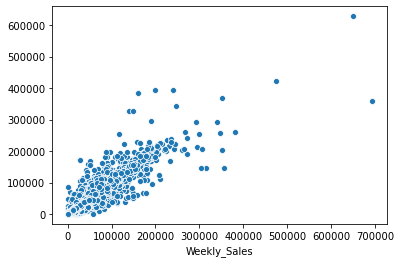

In [21]:
sns.scatterplot(y_test, y_pred)

## Random Forest Regressor

In [22]:
forest = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=400, n_jobs=5)

In [23]:
print("Training set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.96


In [24]:
y_pred = forest.predict(X_test)

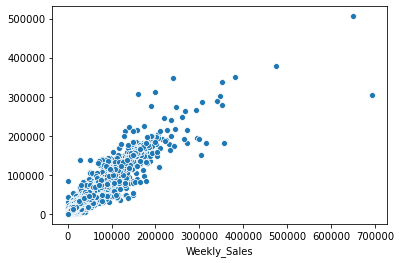

In [25]:
sns.scatterplot(y_test, y_pred)

## Search Grid HyperParams

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('walmart_clean.csv')

In [31]:
data.describe()

,Store,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Week,Day,Month,Year,Type_A,Type_B,Type_C
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,136749.732787,60.090599,3.360890,171.212496,7.960000,0.070345,44.241309,16033.114591,25.828408,15.673903,6.449866,2010.968454,0.511554,0.387393,0.101054
std,12.787236,60993.084568,18.447857,0.458519,39.162445,1.863879,0.255729,30.508819,22729.492116,14.152489,8.752818,3.243397,0.796898,0.499867,0.487155,0.301400
min,1.000000,34875.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,0.010000,1.000000,1.000000,1.000000,2010.000000,0.000000,0.000000,0.000000
25%,11.000000,93638.000000,46.680000,2.933000,132.022667,6.891000,0.000000,18.000000,2120.130000,14.000000,8.000000,4.000000,2010.000000,0.000000,0.000000,0.000000
50%,22.000000,140167.000000,62.090000,3.452000,182.350989,7.866000,0.000000,37.000000,7661.700000,26.000000,16.000000,6.000000,2011.000000,1.000000,0.000000,0.000000
75%,33.000000,202505.000000,74.280000,3.738000,212.445487,8.567000,0.000000,74.000000,20271.265000,38.000000,23.000000,9.000000,2012.000000,1.000000,1.000000,0.000000
max,45.000000,219622.000000,100.140000,4.468000,227.232807,14.313000,1.000000,99.000000,693099.360000,52.000000,31.000000,12.000000,2012.000000,1.000000,1.000000,1.000000


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    ridge_regression,
    Lasso,
    SGDRegressor,
    Ridge
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

As Showed above, for all the models used the Random Forest Regressor and Decission Trees output the hightest result at test and train. To verify this result Cross Validation will be perfom over search grid process, hece the best parameters will be selected

In [33]:
# Attemp with feature normalization

In [34]:
y = data['Weekly_Sales']
X = data.drop(['Weekly_Sales','Year','Date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (294148, 14) (294148,)
Test:  (126064, 14) (126064,)


In [35]:
X_train

,Store,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Week,Day,Month,Type_A,Type_B,Type_C
70464,19,203819,74.68,2.924,132.582581,8.099,0,7,29,23,7,1,0,0
385685,15,123737,73.99,3.863,138.143774,8.193,0,83,32,10,8,0,1,0
85484,45,118221,71.36,2.755,182.610406,8.743,0,16,34,27,8,0,1,0
274053,5,34875,64.33,3.308,218.793912,6.300,0,30,46,18,11,0,1,0
50958,17,93188,53.79,2.871,126.136065,6.635,0,7,22,4,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215074,13,219622,74.29,3.613,129.089400,6.877,0,52,26,1,7,1,0,0
252841,3,37392,82.58,3.355,220.085696,7.567,0,33,39,30,9,0,1,0
176223,21,140167,56.36,3.524,214.488691,7.931,0,28,13,1,4,0,1,0
177162,2,202307,55.43,3.524,214.488691,7.931,0,32,13,1,4,1,0,0


In [36]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
forest = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)
forest.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=15, n_estimators=400, n_jobs=5)

In [38]:
print("Training set score: {:.2f}".format(forest.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test_scaled, y_test)))

Training set score: 0.98
Test set score: 0.96


In [39]:
y_pred = forest.predict(X_test_scaled)

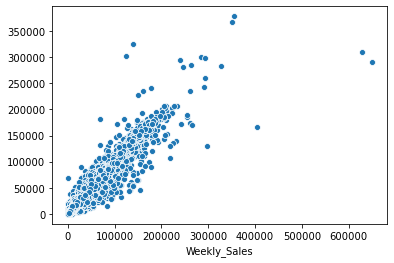

In [40]:
sns.scatterplot(y_test, y_pred)

In [41]:
### KNN data scaled

In [42]:
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=4, n_neighbors=10)

In [43]:
print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Training set score: 0.34
Test set score: 0.19


In [44]:
y_pred = knn.predict(X_test_scaled)

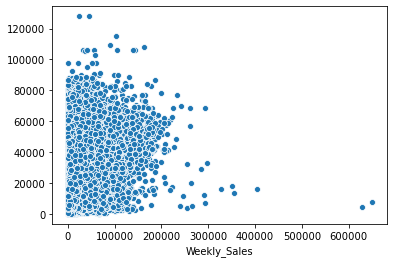

In [45]:
sns.scatterplot(y_test, y_pred)

In [46]:
# Searchgrid using Sklearn library

In [47]:
param_grid_rF = {'n_estimators': [100, 200, 300],
                 'max_depth' : [5, 15, 30],
              'n_jobs': [20]}

In [48]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid_rF, cv=2)

In [49]:
# grid without data normalization
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [20]})

In [50]:
result = ("Test set score (normalized data): {:.2f}".format(grid_search.score(X_test_scaled, y_test))+\
"Best parameters (normalized data): {}".format(grid_search.best_params_) +\
"Best cross-validation score (normalized data): {:.2f}".format(grid_search.best_score_)+\
"Best estimator (normalized data):\n{}".format(grid_search.best_estimator_))

In [51]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.97
Best parameters: {'max_depth': 30, 'n_estimators': 200, 'n_jobs': 20}
Best cross-validation score: 0.97
Best estimator:
RandomForestRegressor(max_depth=30, n_estimators=200, n_jobs=20)


In [52]:
### KNN searchgrid

In [53]:
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : un

In [54]:
param_grid_knn = {'n_neighbors': [3, 5, 15, 25, 45],
                 'weights' : ['uniform', 'distance'],
              'p': [1, 2],
                
                'n_jobs':[10,20]}

In [55]:
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=3)

In [56]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_jobs': [10, 20], 'n_neighbors': [3, 5, 15, 25, 45],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [57]:
print("Test set score: {:.2f}".format(grid_search_knn.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))

Test set score: 0.41
Best parameters: {'n_jobs': 10, 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.41
Best estimator:
KNeighborsRegressor(n_jobs=10, n_neighbors=25, p=1)


In [58]:
### LinearRegressor CV - Normalized

In [59]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [60]:
LR = LinearRegression()
LR.fit(X_train,y_train)

print("lr.coef_: {}".format(LR.coef_))
print("lr.intercept_: {}".format(LR.intercept_))

lr.coef_: [-1.50182102e+02  9.97401039e-02  1.12681598e+00  4.50019713e+01
 -2.44258569e+01 -2.28689232e+02  9.20928707e+02  1.11385533e+02
 -7.64984026e+02  8.76326947e+01  3.51825846e+03 -1.91860112e+03
 -2.23111453e+03  4.14971564e+03]
lr.intercept_: 3659.401074165062


In [61]:
print("Training set score: {:.2f}".format(LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LR.score(X_test, y_test)))

Training set score: 0.09
Test set score: 0.09


Note, normalization computed beforehand training step does not improve result

In [62]:
### Decision Trees

In [63]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"mse", "friedman_mse", "mae"}, default="mse"
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential s

In [70]:
param_grid_dt = {'max_depth': [3, 5, 15, 25, 45, 70],
                'splitter' : ['best', 'random'],
                'min_samples_split': [2, 4, 8],                
                'min_samples_leaf':[2, 4, 8, 18],
                'max_leaf_nodes':[3, 5, 15, 45, 70]}

In [71]:
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=3)

In [72]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 15, 25, 45, 70],
                         'max_leaf_nodes': [3, 5, 15, 45, 70],
                         'min_samples_leaf': [2, 4, 8, 18],
                         'min_samples_split': [2, 4, 8],
                         'splitter': ['best', 'random']})

In [73]:
print("Test set score: {:.2f}".format(grid_search_dt.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))
print("Best estimator:\n{}".format(grid_search_dt.best_estimator_))

Test set score: 0.78
Best parameters: {'max_depth': 15, 'max_leaf_nodes': 70, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.79
Best estimator:
DecisionTreeRegressor(max_depth=15, max_leaf_nodes=70, min_samples_leaf=18)
